# Producción de Energía

<b><i style="font-size:13px">Tags: </i></b><i style="font-size:11px">Transporte</i>

## Enunciado
CryptOR is una compañía que se dedica a minar criptomonedas. El mayor problema de planeación para CryptOR es la compra de energía. Dado el alto consumo de energía, CryptOR debe negociar contratos anuales con las diferentes empresas de generación eléctrica. El costo por kilovatio-hora (kWh) varía según la cantidad de energía contratada y la empresa generadora. La tabla 1 indica la función de costo por kilovatio-hora para cada empresa generadora.         

### Tabla 1. Cost de energía for $x$ kilovatios-hora.

|            |**Función de costo**|
|:----------:|----------:|
|**Carbon**|$c(x) = 0.0012 x^2$        |
|**Solar**|$c(x) = 0.0028 x^2 - 0.5x + 35$|
|**Eólica**|$c(x) = 0.5 x log(\frac{x}{150}) + 30$

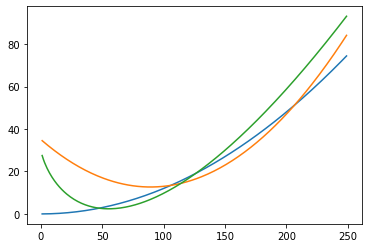

In [62]:
import matplotlib.pyplot as plt
import numpy as np
kwh = np.arange(1,250)
# TODO add subplots
def f1(x):
    return 0.0012 * (x ** 2)
def f2(x):
    return 0.0028 * x ** 2 - 0.5*x + 35
def f3(x):
    return 0.5 * x*np.log(x/150) + 30
plt.plot(kwh, f1(kwh))
plt.plot(kwh, f2(kwh))
plt.plot(kwh, f3(kwh))


TODO: linearizar

(-1.0, 100.0)

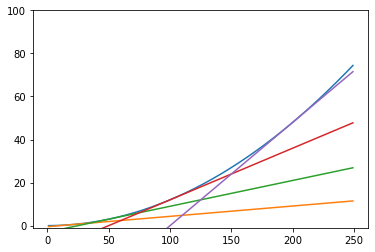

In [69]:
plt.plot(kwh, f1(kwh))
for x_0 in [20, 50, 100, 200]:
    plt.plot(kwh, f1(x_0) + 0.0012*2 * x_0 * (kwh - x_0))
    print(f'Function en {x_0}:  {f1(x_0):.3f} + {df1(x_0):.3f} * (x - {x_0})')
plt.ylim([-1, 100])

(-1.0, 100.0)

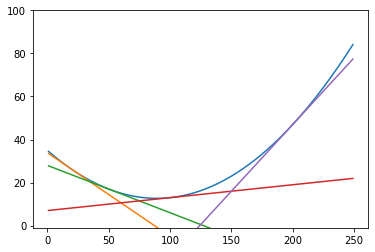

In [70]:
plt.plot(kwh, f2(kwh))
def df2(x):
    return 2 * 0.0028 * x - 0.5
for x_0 in [20, 50, 100, 200]:
    plt.plot(kwh, f2(x_0) + df2(x_0) * (kwh - x_0))
    print(f'Function en {x_0}:  {f2(x_0):.3f} + {df2(x_0):.3f} * (x - {x_0})')
plt.ylim([-1, 100])

Function en 20:  9.851 + -0.507 * (x - 20)
Function en 50:  2.535 + -0.049 * (x - 50)
Function en 100:  9.727 + 0.297 * (x - 100)
Function en 200:  58.768 + 0.644 * (x - 200)


(-1.0, 100.0)

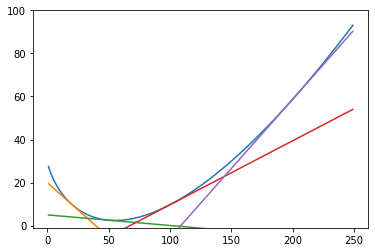

In [76]:
plt.plot(kwh, f3(kwh))
def df3(x):
    return 0.5 * np.log(x/150) + 0.5
for x_0 in [20, 50, 100, 200]:
    plt.plot(kwh, f3(x_0) + df3(x_0) * (kwh - x_0))
    print(f'Function en {x_0}:  {f3(x_0):.3f} + {df3(x_0):.3f} * (x - {x_0})')
plt.ylim([-1, 100])

<div style="text-align:justify">
Formule un modelo general de optimización lineal que le permita a La Lechera Ramírez satisfacer la demanda de sus clientes, al menor costo posible. Para esto usted debe seguir los siguientes pasos: 

## Formulación

**1.** Escriba lo(s) conjunto(s), parámetro(s) y variable(s) de decisión que utilizará en el modelo.  

### Conjuntos
- $P$: Plantas
- $D$: Distribuidores

### Parámetros
- $b_i$: oferta de leche de la planta $i\in P$
- $t_j$: demanda de leche del distribuidor $j\in D$ 
- $c_{ij}$: costo de envío de un litro de leche de la planta $i\in P$ al distribuidor $j\in D$

### Variables de decisión
- $x_{ij}$: cantidad (en litros) de leche que van de la planta $i\in P$ al distribuidor $j\in D$

### Restricciones
**2.** Escriba la(s) restricción(es) lineal(es) que garantiza(n) que se debe respetar la oferta de las plantas. 


$$
\begin{align}
\sum_{j\in D}x_{ij} &\le b_i, &&\forall i\in P.
\end{align}
$$

**3.** Escriba la(s) restricción(es) lineal(es) que garantiza(n) que se debe satisfacer la demanda de los distribuidores.  

$$
\begin{align}
\sum_{i\in P}x_{ij} &\ge t_j, &&\forall j\in D.
\end{align}
$$

**4.** Escriba la(s) restricción(es) que describe(n) matemáticamente el tipo de variable(s) que está utilizando dentro del modelo. 

$$
\begin{align}
x_{ij} & \ge 0, &&\forall i\in P,j\in D.
\end{align}
$$

### Función Objetivo
**5.** Escriba la función objetivo.

$$
\text{minimizar }  \sum_{i\in P}\sum_{j\in D}x_{ij}c_{ij}
$$

## Formulación matemática completa

**Conjuntos:**
- $P$: Plantas
- $D$: Distribuidores

**Parámetros:**
- $b_i$: oferta de leche de la planta $i\in P$
- $t_j$: demanda de leche del distribuidor $j\in D$ 
- $c_{ij}$: costo de envío de un litro de leche de la planta $i\in P$ al distribuidor $j\in D$

**Variables de decisión:**
- $x_{ij}$: cantidad (en litros) de leche que van de la planta $i\in P$ al distribuidor $j\in D$

**Modelo:**

$$
\text{minimizar }  \sum_{i\in P}\sum_{j\in D}x_{ij}c_{ij} \text{ (1)} 
$$

Sujeto a,

$$
\begin{align*}
\sum_{j\in D}x_{ij} &\le b_i, &&\forall i\in P; &(2)\\
\sum_{i\in P}x_{ij} &\ge t_j, &&\forall j\in D; &(3)\\
x_{ij} & \ge 0, &&\forall i\in P,j\in D. &(4)
\end{align*}
$$

La función objetivo (1) minimiza los costos totales. Las restricciones (2) garantizan que se debe respetar la oferta de las plantas. Las restricciones (3) garantizan que se debe satisfacer la demanda de los distribuidores. Las restricciones (4) describe la naturaleza de la variable $x_{ij}$. 

## Implementación
**6.** Resuelva el modelo planteado utilizando la librería de PulP en Python. ¿Cuál es la solución
óptima del problema? 

In [25]:
#se importa la libreria de PulP
import pulp as lp

#-----------------
# Conjuntos
#-----------------
#Plantas
P=["Planta 1",
   "Planta 2",
   "Planta 3",
   "Planta 4"]

#Distribuidores
D=["Distribuidor 1",
   "Distribuidor 2",
   "Distribuidor 3",
   "Distribuidor 4",
   "Distribuidor 5",
   "Distribuidor 6",
   "Distribuidor 7",
   "Distribuidor 8"]

# Conjunto con todas las duplas (planta, distribuidor)
P_x_D = [(planta, distribuidor) for planta in P for distribuidor in D] 

#-----------------
# Parámetros
#-----------------
b={#planta: oferta de la planta i
   "Planta 1":1500,
   "Planta 2":1200,
   "Planta 3":1400,
   "Planta 4":1000} 

t={#distribuidor: demanda del distribuidor j
   "Distribuidor 1":930,
   "Distribuidor 2":600,
   "Distribuidor 3":460,
   "Distribuidor 4":610,
   "Distribuidor 5":830,
   "Distribuidor 6":460,
   "Distribuidor 7":640,
   "Distribuidor 8":240} 

c={#(planta, distribuidor): costo de envio de un litro de leche desde la planta i al distribuidor j
   ("Planta 1","Distribuidor 1"):650,
   ("Planta 1","Distribuidor 2"):125,
   ("Planta 1","Distribuidor 3"):1200,
   ("Planta 1","Distribuidor 4"):340,
   ("Planta 1","Distribuidor 5"):150,
   ("Planta 1","Distribuidor 6"):260,
   ("Planta 1","Distribuidor 7"):350,
   ("Planta 1","Distribuidor 8"):800,
   ("Planta 2","Distribuidor 1"):250,
   ("Planta 2","Distribuidor 2"):200,
   ("Planta 2","Distribuidor 3"):250,
   ("Planta 2","Distribuidor 4"):600,
   ("Planta 2","Distribuidor 5"):150,
   ("Planta 2","Distribuidor 6"):950,
   ("Planta 2","Distribuidor 7"):1050,
   ("Planta 2","Distribuidor 8"):1000,
   ("Planta 3","Distribuidor 1"):600,
   ("Planta 3","Distribuidor 2"):350,
   ("Planta 3","Distribuidor 3"):400,
   ("Planta 3","Distribuidor 4"):260,
   ("Planta 3","Distribuidor 5"):150,
   ("Planta 3","Distribuidor 6"):300,
   ("Planta 3","Distribuidor 7"):450,
   ("Planta 3","Distribuidor 8"):600,
   ("Planta 4","Distribuidor 1"):450,
   ("Planta 4","Distribuidor 2"):800,
   ("Planta 4","Distribuidor 3"):650,
   ("Planta 4","Distribuidor 4"):250,
   ("Planta 4","Distribuidor 5"):340,
   ("Planta 4","Distribuidor 6"):700,
   ("Planta 4","Distribuidor 7"):600,
   ("Planta 4","Distribuidor 8"):620} 

#-------------------------------------
# Creación del objeto problema en PuLP
#-------------------------------------
#Crea el problema para cargarlo con la instancia 
problema=lp.LpProblem("Transporte",lp.LpMinimize)

#-----------------------------
# Variables de Decisión
#-----------------------------
x=lp.LpVariable.dicts('x',P_x_D,lowBound=0,cat='Continuous') #litros de leche que van de la planta i al distribuidor j;
                                                             #aca se añade de una vez la naturaleza de las variables

#-----------------------------
# Función objetivo
#-----------------------------
#Crea la expresión de minimización de costos
problema+=lp.lpSum(x[i,j]*c[i,j] for i in P for j in D), "Costos Totales"

#-----------------------------
# Restricciones
#-----------------------------
#sum(j in D)x_ij <= b_i forall i in P
for i in P:
    problema+= lp.lpSum(x[i,j] for j in D) <= b[i], "Oferta de la planta "+i   #se respeta la oferta de cada planta 

#sum(i in P)x_ij >= t_j forall j in D
for j in D:
    problema+= lp.lpSum(x[i,j] for i in P) >= t[j], "Demanda del distribuidor "+j #se satisface la demanda de cada distribuidor 
    
#-----------------------------
# Imprimir formato LP
#-----------------------------
#Escribe el problema en un archivo con formato LP 
problema.writeLP("Transporte.lp")

#-----------------------------
# Invocar el optimizador
#-----------------------------
#Optimizar el modelo con CBC (default de PuLP)
problema.solve()

#-----------------------------
#    Imprimir resultados
#-----------------------------
#Imprimir estado final del optimizador
print("Estado (optimizador):", lp.LpStatus[problema.status],end='\n')

#Valor óptimo del plan de transporte  
print("\nTransporte - Costos totales = $", round(lp.value(problema.objective),2))
print()

#Imprimir variables de decisión
print("Variables de decisión")
print("              ","D1","D2","D3","D4","D5","D6","D7","D8",sep='\t')
for i in P:
    print(i,end='\t')
    for j in D: 
        print(round(x[i,j].value()),end='\t')
    print()

Estado (optimizador): Optimal

Transporte - Costos totales = $ 1224800.0

Variables de decisión
              	D1	D2	D3	D4	D5	D6	D7	D8
Planta 1	0	600	0	0	0	260	640	0	
Planta 2	930	0	270	0	0	0	0	0	
Planta 3	0	0	190	0	830	200	0	180	
Planta 4	0	0	0	610	0	0	0	60	


## Créditos

Equipo de Optimización<br>
Instancia: Camilo Aguilar, Juan Felipe Rengifo<br>
Fecha: 20/09/2020